## Esame Metodi Numerici  4 Luglio 2024 - Turno II Ore 12,30

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import symbols, Matrix, lambdify
import scipy as sp
import SolveTriangular as st

# Esercizio 1

Si considerino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incogniti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **testII.mat**.


- Si risolva ciascuno dei sistemi lineari assegnati  utilizzando il metodo più adatto in base alle caratteristiche della matrice dei coefficienti, giustificando teoricamente le scelte effettuate.
                                      **punti 6**

Per il sistema A1 x1= b1, , aggiungere una perturbazione dello 0.1% sulla componente 1-esima del termine noto, e risolvere il sistema con termine noto perturbato. Calcolare quindi  l'errore relativo sulla soluzione e l'errore relativo sui dati e giustificare i risultati alla luce della teoria.
                                      **punti 2**


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testII')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

In [120]:
from scipy.io import loadmat
import numpy as np
dati = loadmat('testII')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)
A1=dati["A1"] 
A1=A1.astype(float)
b1=dati["b1"] 
b1=b1.astype(float)

m,n=A.shape
m1,n1=A1.shape
print('MATRICE A1')
print('Matrice A quadrata? ', m==n)
print('Dimensione A: ', m)
print('Percentuale Sparsità: ',np.count_nonzero(A)/(m*n)) # Matrice Densa
print('Condizionamento: ', np.linalg.cond(A)) # Ben condizionata
print('Simmetrica? ', np.all(A.T==A))
print('Definita Positiva?', np.all(np.linalg.eigvals(A)>0))
# Uso l'algoritmo di fattorizzazione Cholesky
# Per il teorema della fattorizzazione di Cholesky se la matrice A di ordine n è simmetrica e definita positiva allora
# esiste una matrice triangolare inferiore L con gli elementi diagonali positivi, tale che A=L*L^T

print('MATRICE A1')
print('Matrice A1 quadrata? ', m1==n1)
print('Dimensione A1: {} x {} '.format(m1,n1))
print('Condizionamento: ', np.linalg.cond(A1)) #Altamente Mal Condizionata
print('Rango A1: ', np.linalg.matrix_rank(A1)) # Non a rango massimo
# Uso il metodo Single Value Decomposition Least Squares

MATRICE A1
Matrice A quadrata?  True
Dimensione A:  10
Percentuale Sparsità:  0.96
Condizionamento:  12.814544599567935
Simmetrica?  True
Definita Positiva? True
MATRICE A1
Matrice A1 quadrata?  False
Dimensione A1: 20 x 15 
Condizionamento:  5.697438059606206e+16
Rango A1:  13


In [121]:
def cholesky(A,b):
    L=sp.linalg.cholesky(A, lower=True)
    y,flag=st.Lsolve(L,b)
    if flag==0:
        x,flag=st.Usolve(L.T,y)
    return x

In [122]:
def SVDLS(A,b):
    m,n=A.shape  #numero di righe e  numero di colonne di A
    U,s,VT=sp.linalg.svd(A)  #Attenzione : Restituisce U, il numpy-array 1d che contiene la diagonale della matrice Sigma e VT=VTrasposta)
    #Quindi 
    V=VT.T
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh)
    print("rango=",k)
    d=U.T@b
    d1=d[:k].reshape(k,1)
    s1=s[:k].reshape(k,1)
        
    #Risolve il sistema diagonale di dimensione kxk avene come matrice dei coefficienti la matrice Sigma
    c=d1/s1
    x=V[:,:k]@c
    residuo=np.linalg.norm(d[k:])**2
    return x,residuo

In [124]:
x=cholesky(A,b)
x1=SVDLS(A1,b1)
print('Soluzione A:\n',x)
print('Soluzione A1:\n',x1)

b1p=b1.copy()
b1p[1]=b1p[1]+b1p[1]*0.1 # Perturbo il termine noto

x1p=SVDLS(A1,b1p)
print('Soluzione perturbato A1 :\n',x1)

'''
La soluzione risulta relativamente stabile rispetto a piccole perturbazioni del termine noto 
b, poiché nella decomposizione SVD la moltiplicazione iniziale coinvolge la matrice 
U^T, che è ortogonale e quindi non amplifica gli errori.
Inoltre, la sensibilità complessiva della soluzione dipende principalmente dai valori singolari di 
A: se alcuni sono molto piccoli, possono amplificare componenti del rumore in b, rendendo la soluzione meno stabile.
'''

rango= 13
Soluzione A:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Soluzione A1:
 (array([[0.5210993 ],
       [1.25827182],
       [1.27889527],
       [0.46087355],
       [0.89024294],
       [1.04762977],
       [0.29616227],
       [0.59585228],
       [1.13383321],
       [0.94430646],
       [1.32127485],
       [0.97301581],
       [0.15568769],
       [0.79644108],
       [1.09968922]]), np.float64(1.7410406697260612e-30))
rango= 13
Soluzione perturbato A1 :
 (array([[0.5210993 ],
       [1.25827182],
       [1.27889527],
       [0.46087355],
       [0.89024294],
       [1.04762977],
       [0.29616227],
       [0.59585228],
       [1.13383321],
       [0.94430646],
       [1.32127485],
       [0.97301581],
       [0.15568769],
       [0.79644108],
       [1.09968922]]), np.float64(1.7410406697260612e-30))


'\nLa soluzione risulta relativamente stabile rispetto a piccole perturbazioni del termine noto \nb, poiché nella decomposizione SVD la moltiplicazione iniziale coinvolge la matrice \nU^T, che è ortogonale e quindi non amplifica gli errori.\nInoltre, la sensibilità complessiva della soluzione dipende principalmente dai valori singolari di \nA: se alcuni sono molto piccoli, possono amplificare componenti del rumore in b, rendendo la soluzione meno stabile.\n'

- Dato il sistema lineare 
A3 x3 = b3
dove 

A3=np.array([[8.0,0,1,1],[0,0.8,1,0],[1,1,2,0],[1,0,0.0,2.0]])
b3= np.array([10.0, 1.8,  4.0, 3.0])

- Verificare senza calcolare il raggio spettrale della matrice di iterazione che il metodo di Gauss-Seidel converge, richiamando il teorema che garantisce la convergenza di Gauss-Seidel per classi particolari di 
matrici     **punti[1]**.
- Implementare il metodo di Gauss-Seidel  e risolvere il sistema lineare A3 x3= b3  **punti[3]**.

Totale **Punti 12**

In [213]:
A3=np.array([[8.0,0,1,1],[0,0.8,1,0],[1,1,2,0],[1,0,0.0,2.0]])
n3=A3.shape[0]
b3= np.array([10.0, 1.8,  4.0, 3.0]).reshape(n3,1)

# 2 modi per controllare la convergenza nel metodo di gauss-seidel:
# 1. Controllare che la matrice sia a diagonale strettamente dominante
# 2. Controllare che la matrice sia simmetrica e definita positiva
#    - Si può dimostrare che se vale una delle condizoni allora vale: ||T||<1 che è condizione sufficiente per la convergenza.

abs_A=np.abs(A3)
print('Matrice A3 è diagonale strettamente dominante?', np.all(2*np.diag(abs_A) > np.sum(abs_A, axis=1)))
print('Matrice A3 simmetrica?', np.all(A3.T==A3))
eigvals=np.linalg.eigvals(A3)
print('Matrice A3 definita positiva?',np.all(eigvals>0))

Matrice A3 è diagonale strettamente dominante? False
Matrice A3 simmetrica? True
Matrice A3 definita positiva? True


In [215]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F

    # Convergence check
    invM=np.linalg.inv(M)
    T=invM@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)

    print("Norm:", np.linalg.norm(T,2))
    
    it=0
    er_vet=[]
    while it<=it_max and errore>=toll:
        x,flag=st.Lsolve(M,b-F@x0)  #Calcolare la soluzione al passo k equivale a calcolare la soluzione del sistema triangolare con matrice M=D+E
                               # e termine noto b-F@x0
        #print('M\n{}\nb-Fx0\n{}\nx{}'.format(M,b-F@x0,x))
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

In [217]:
x03=np.zeros(n3).reshape(n3,1)
it_max=200
tol=1e-10
x3,it3,er_vet=gauss_seidel(A3,b3,x03,toll,it_max)
print('Soluzione: \n{}\n Iterazioni: {}\n'.format(x3,it3))

raggio spettrale Gauss-Seidel  0.6936887195995491
Norm: 1.4340881282884286
Soluzione: 
[[1.]
 [1.]
 [1.]
 [1.]]
 Iterazioni: 62



## Esercizio 2

Per ogni $k \in N$ l'equazione di II grado $x^2+(4^{2k}-2^{-2k})x-4^{2k}2^{-2k}=0 $ ha come soluzioni esatte $x_1=-4^{2k}$,$x_2=2^{-2k}$,

Per ogni $k \in N$ l'equazione di II grado $x^2+(4^{2k}-2^{-2k})x-4^{2k}2^{-2k}=0 $ ha come soluzioni esatte $x_1=-4^{2k}$,$x_2=2^{-2k}$,
Scrivere lo script python in cui
- si implementa la formula risolutiva delle equazioni di II grado per calcolare le  due soluzioni per $k$ che  assume valori interi tra 4 e 12;  [**Punti 2**]
- per entrambe le soluzioni, si calcola l'errore relativo commesso al variare di k che assume valori interi tra 4 e 12;   [**Punti 1**]
- si rappresentano in un grafico gli andamenti dei due errori relativi calcolati nel punto precedente; [**Punti 1**]
- osservando i grafici ottenuti, si dica se le formule utilizzate per calcolare le due soluzioni hanno dato luogo ad algoritmi stabili, motivando opportunamente la risposta alla luce della teoria.   [**Punti 4**]

- proporre ed implementare un algoritmo alternativo stabile per il calcolo della soluzione per cui la formula risolutiva classica si è dimostrata non essere stabile. [**Punti 2**]

spacing b:  7.275957614183426e-12 spacing delta:  1.4551915228366852e-11  valore sottratto:  0.00390625  valore reale:  0.00390625
iteration:  4
spacing b:  1.1641532182693481e-10 spacing delta:  2.3283064365386963e-10  valore sottratto:  0.0009765625  valore reale:  0.0009765625
iteration:  5
spacing b:  1.862645149230957e-09 spacing delta:  3.725290298461914e-09  valore sottratto:  0.000244140625  valore reale:  0.000244140625
iteration:  6
spacing b:  2.9802322387695312e-08 spacing delta:  5.960464477539063e-08  valore sottratto:  6.103515625e-05  valore reale:  6.103515625e-05
iteration:  7
spacing b:  4.76837158203125e-07 spacing delta:  9.5367431640625e-07  valore sottratto:  1.52587890625e-05  valore reale:  1.52587890625e-05
iteration:  8
spacing b:  1.52587890625e-05 spacing delta:  1.52587890625e-05  valore sottratto:  0.0  valore reale:  3.814697265625e-06
iteration:  9
spacing b:  0.000244140625 spacing delta:  0.000244140625  valore sottratto:  0.0  valore reale:  9.536743

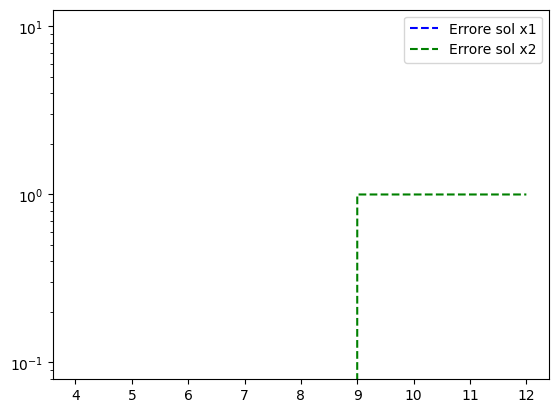

In [143]:
a=lambda k: 1
b=lambda k: 4**(2*k)-2**(-2*k)
c=lambda k: -4**(2*k)*2**(-2*k)

solx1=lambda k: -4**(2*k)
solx2=lambda k: 2**(-2*k)

errorex1=[]
errorex2=[]

for k in range(4,13):
    delta=np.sqrt(b(k)**2-4*a(k)*c(k))
    
    x1=(-b(k)-delta)/(2*a(k))
    x2=(-b(k)+delta)/(2*a(k))
    solx1k=solx1(k)
    solx2k=solx2(k)
    print('spacing b: ',np.spacing(b(k)),'spacing delta: ',np.spacing(delta),' valore sottratto: ', x2, ' valore reale: ',solx2k)
    print('iteration: ',k)   
    errorex1.append(abs(solx1k-x1)/abs(solx1k))
    errorex2.append(abs(solx2k-x2)/abs(solx2k))

plt.semilogy(range(4,len(errorex1)+4),errorex1,'b--',range(4,len(errorex2)+4),errorex2,'g--')
plt.legend(['Errore sol x1','Errore sol x2'])

# per valori grandi (k>8) il risultato corretto, ha la precisione troppo alta per essere rappresentata con la differenza di due numeri grandi;
# Risulta quindi che la differenza vale 0

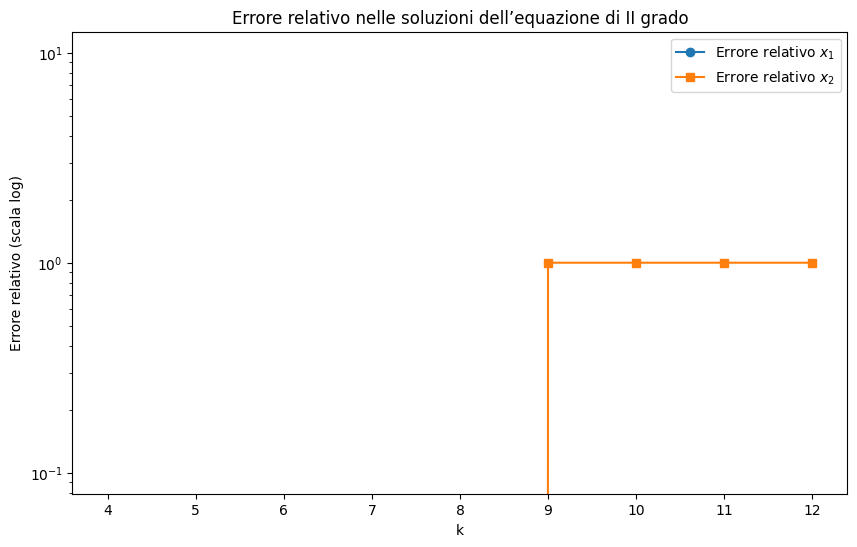

In [117]:
# Intervallo dei valori di k
ks = np.arange(4, 13, dtype=float)

# Soluzioni esatte
x1_exact = lambda k: -4**(2*k)
x2_exact = lambda k: 2**(-2*k)

# Inizializziamo liste per errori relativi
errors_x1 = []
errors_x2 = []

# Funzione risolutiva classica
def solve_quadratic_classic(a, b, c):
    delta = b**2 - 4*a*c
    sqrt_delta = np.sqrt(delta)
    x1 = (-b + sqrt_delta) / (2*a)
    x2 = (-b - sqrt_delta) / (2*a)
    return x1, x2

# Loop su tutti i k
for k in ks:
    a = 1
    b = 4**(2*k) - 2**(-2*k)
    c = -4**(2*k) * 2**(-2*k)
    
    # Soluzioni classiche
    x1, x2 = solve_quadratic_classic(a, b, c)
    
    # Ordiniamo per confrontare correttamente con le esatte
    computed = sorted([x1, x2])
    exact = sorted([x1_exact(k), x2_exact(k)])
    
    # Calcolo errori relativi
    err1 = abs((computed[0] - exact[0]) / exact[0])
    err2 = abs((computed[1] - exact[1]) / exact[1])
    
    errors_x1.append(err1)
    errors_x2.append(err2)

# === GRAFICO ===
plt.figure(figsize=(10,6))
plt.plot(ks, errors_x1, marker='o', label='Errore relativo $x_1$')
plt.plot(ks, errors_x2, marker='s', label='Errore relativo $x_2$')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('Errore relativo (scala log)')
plt.title('Errore relativo nelle soluzioni dell’equazione di II grado')
plt.legend()
plt.show()

- Ricavavare la formula che quantifica l'indice di condizionamento del problema di valutare una funzione $f:R \rightarrow R$ in un punto $x \in R$ [**punti 3**]

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

Domande a risposta multipla

**1** 
Quale delle seguenti affermazioni è FALSA riguardo alle reti MLP (Multilayer Perceptron)?

- Le reti MLP sono composte da uno o più strati nascosti di neuroni.
- Le reti MLP utilizzano una funzione di attivazione non lineare per introdurre una non linearità nel modello.

- Le reti MLP sono in grado di apprendere solo relazioni lineari tra i dati di input e output.

- Le reti MLP possono essere utilizzate per risolvere una vasta gamma di problemi di apprendimento automatico, tra cui la classificazione e la regressione.

**2.**  Quale delle seguenti affermazioni è la definizione CORRETTA di learning rate nel training di una rete neurale?

A) Il numero di volte in cui l'intero set di dati viene utilizzato durante il training.

B) Un parametro che controlla la velocità con cui i pesi della rete vengono aggiornati durante il training.

C) Il numero di neuroni presenti nello strato di output della rete.

D) La funzione di attivazione utilizzata dai neuroni della rete.ressione

**3.**  
Quale tra le seguenti affermazioni descrive meglio il compito della funzione di attivazione nel training di una rete neurale?

- Trasformare i dati di input in un formato compatibile con la rete neurale

- Introdurre una non linearità nel flusso di informazioni della rete

- Calcolare l'errore tra l'output previsto e quello effettivo

- Aggiornare i pesi delle connessioni tra i neuroni softmax


**4.** Quale delle seguenti definizioni descrive meglio un'epoca nel training di una rete neurale?
- Il numero di volte in cui viene aggiornato un singolo peso nella rete
- Il tempo impiegato per completare un ciclo di forward pass e backward propagation
- Il numero di volte in cui l'intero set di dati di training viene esposto alla rete
- Una misura della complessità del modello di rete neurale


**5.** Quale tra le seguenti affermazioni è FALSA riguardo alla suddivisione del dataset in un contesto di machine learning?

- La suddivisione del dataset in set di training, validation e test è fondamentale per valutare correttamente le prestazioni di un modello di machine learning.
- Il set di training viene utilizzato per addestrare il modello sui dati.
- Il set di validation viene utilizzato per trovare le etichette dei dati di input
- Il set di test viene utilizzato per valutare le prestazioni finali del modello su dati che non sono stati utilizzati per il training o la validation.


**Domande aperte**

**6. Descrivi in cosa consiste la fase di forward-propagation e back-propagation nell'ambito del training di una rete neurale, soffermandoti sull'importanza dell'algoritmo di backpropagation** per il calcolo delle derivate parziali della funzione costo rispetto ai pesi di tutti i layer **[punti 1.5]**

**7** Ricavare la formula di aggiornamento dei pesi mediante algoritmo di backpropagation nel caso di una rete MLP formata da un nodo di input, 2 layer nascosti ciascuno dei quali costituito da un solo neurone ed un nodo di output.   **[punti: 3]**